<a href="https://colab.research.google.com/github/RodneyRibeiro/Dio-Desafios/blob/Desafios_Dio/DIO_aula2_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pnd

df1 = pnd.read_excel("/content/drive/MyDrive/Colab Panda/datasets/Aracaju.xlsx")
df2 = pnd.read_excel("/content/drive/MyDrive/Colab Panda/datasets/Fortaleza.xlsx")
df3 = pnd.read_excel("/content/drive/MyDrive/Colab Panda/datasets/Natal.xlsx")
df4 = pnd.read_excel("/content/drive/MyDrive/Colab Panda/datasets/Recife.xlsx")
df5 = pnd.read_excel("/content/drive/MyDrive/Colab Panda/datasets/Salvador.xlsx")

In [2]:
# Juntar todas as tabelas
df = pnd.concat([df1,df2,df3,df4,df5])

In [4]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
169,Salvador,2019-01-02,166.73,1037,2
126,Natal,2019-01-02,41.69,1036,2
159,Salvador,2019-01-02,172.52,1035,1
94,Fortaleza,2019-01-01,150.49,1003,5
90,Recife,2019-01-01,16.04,980,1


In [5]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [6]:
df["LojaID"] = df["LojaID"].astype("object")

In [7]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [8]:
# Se houver valores nulos, retornar a contagem de ocorrências
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [9]:
# Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [10]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
# Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
# Remover as linhas com valores faltantes
df.dropna(how="all", inplace=True)

In [12]:
# Criando a Coluna de Receitas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [13]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [15]:
df["Receita"].max()

3544.0

In [16]:
df["Receita"].min()

3.34

In [17]:
# Top 3 com base na coluna receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [18]:
# Top 3 piores com base na coluna receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [19]:
# Agrupar por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [20]:
# Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [21]:
# Aqui vai um exemplo de quando encontrarmos o campo data como outro tipo de dados que não seja data
df["Data"] = df["Data"].astype("int64")

In [22]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [23]:
# Transformando a coluna de data em data
df["Data"] = pnd.to_datetime(df["Data"])

In [24]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [26]:
# Agrupamento por ano, retorna somente o ano em dt.year
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [27]:
# Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [28]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
80,Aracaju,2018-01-01,121.77,1523,3,365.31,2018
71,Salvador,2019-01-01,21.36,1035,2,42.72,2019
76,Fortaleza,2019-01-01,38.61,1004,4,154.44,2019
89,Natal,2019-01-02,17.46,1034,1,17.46,2019
49,Natal,2019-04-01,831.00,852,2,1662.00,2019


In [31]:
# Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [32]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
146,Natal,2019-01-02,149.88,1037,1,149.88,2019,1,2
47,Natal,2018-03-13,521.00,854,3,1563.00,2018,3,13
30,Aracaju,2018-01-01,119.21,1520,8,953.68,2018,1,1
38,Fortaleza,2019-01-01,35.09,1004,4,140.36,2019,1,1
65,Fortaleza,2019-01-01,145.20,1005,2,290.40,2019,1,1


In [33]:
# Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [34]:
# Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [35]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
65,Natal,2019-04-05,292.00,852,2,584.00,2019,4,5,459 days
193,Natal,2019-01-02,3.97,1036,2,7.94,2019,1,2,366 days
24,Aracaju,2018-01-01,151.04,1522,6,906.24,2018,1,1,0 days
109,Natal,2019-01-02,124.37,1035,1,124.37,2019,1,2,366 days
73,Fortaleza,2019-01-01,3.10,1003,5,15.50,2019,1,1,365 days


In [36]:
# Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [37]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
57,Recife,2019-01-01,201.41,980,3,604.23,2019,1,1,365 days,1
79,Salvador,2019-01-01,19.02,1034,2,38.04,2019,1,1,365 days,1
116,Natal,2019-01-02,41.78,1034,3,125.34,2019,1,2,366 days,1
100,Aracaju,2018-01-01,180.57,1520,6,1083.42,2018,1,1,0 days,1
214,Salvador,2019-01-02,54.94,1036,2,109.88,2019,1,2,366 days,1


In [38]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [39]:
df["LojaID"].value_counts(ascending=False)

LojaID
1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: count, dtype: int64

<Axes: xlabel='LojaID'>

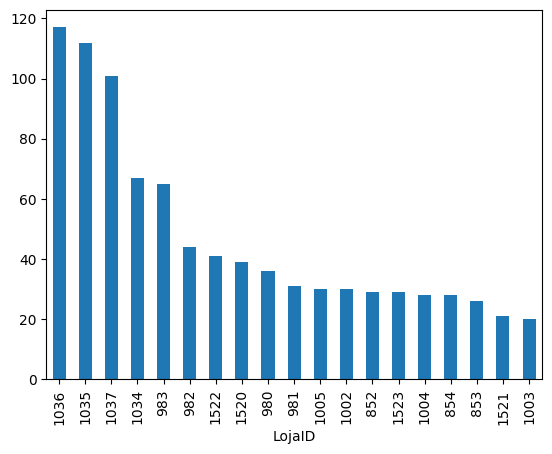

In [40]:
df["LojaID"].value_counts(ascending=False).plot.bar()

<Axes: ylabel='LojaID'>

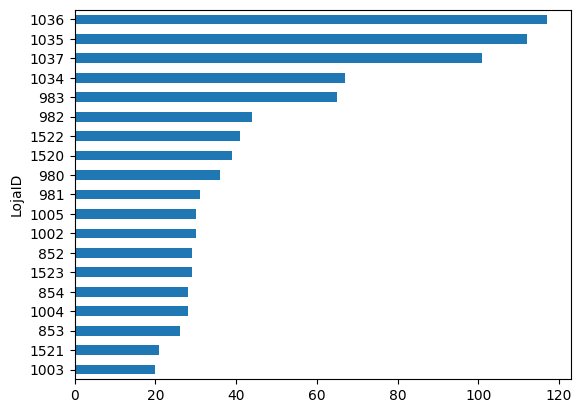

In [41]:
df["LojaID"].value_counts(ascending=True).plot.barh()

<Axes: ylabel='Receita'>

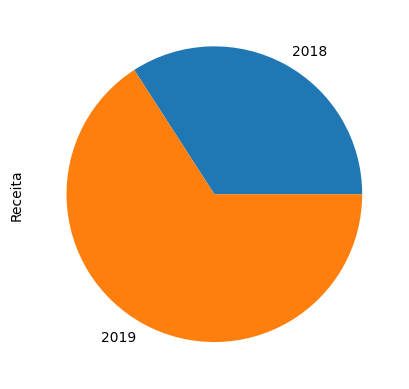

In [42]:
# Gráfico Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [43]:
# Total de Vendas por Cidade
df["Cidade"].value_counts()

Cidade
Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: count, dtype: int64

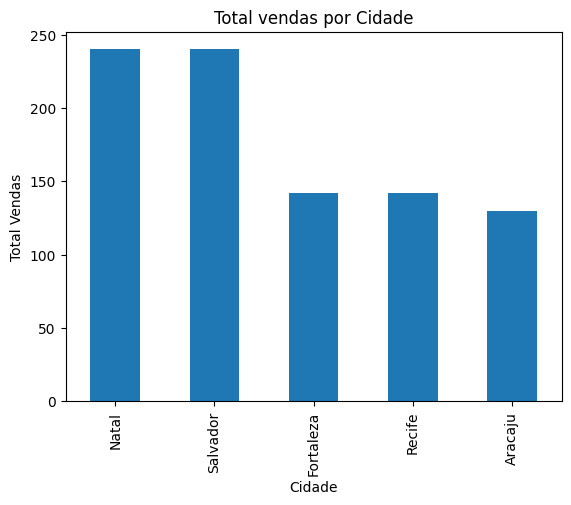

In [45]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");# ; para tirar linha de cima

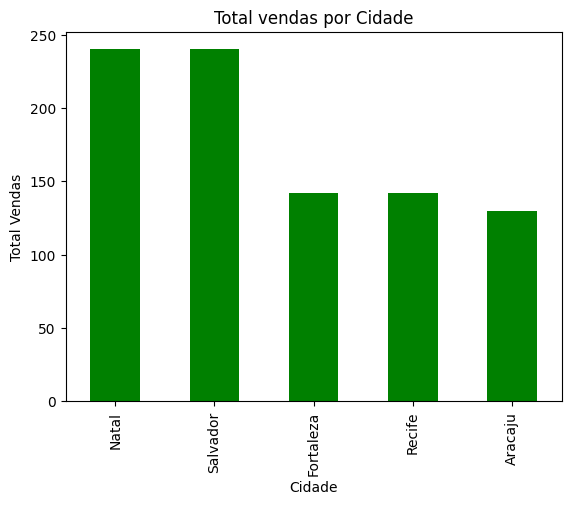

In [46]:
#Alterando a cor da barra
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="green")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");# ; para tirar linha de cima

In [49]:
# Alterando o estilo
plt.style.use("ggplot")

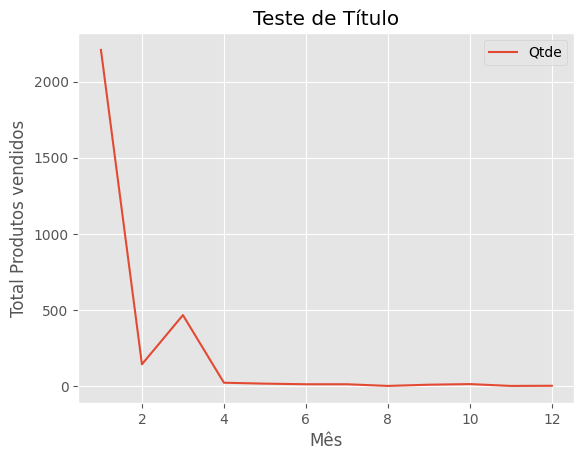

In [52]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Teste de Título")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos");
plt.legend()